<a href="https://colab.research.google.com/github/Jay-Damodaran/PersonalProjects/blob/main/Projects/housepriceregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as RMSE, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.model_selection import train_test_split as tts

In [ ]:
!pip install ipywidgets
!pip install -q condacolab
import condacolab
condacolab.install()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.6 MB/s eta 0:00:00
⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


## Uploading csvs and viewing them as pd dataframes

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
# if uploaded from local disk
train_houseprice_data = pd.read_csv('train.csv')
#test_houseprice_data = pd.read_csv('test.csv')

In [2]:
# read from drive
train_houseprice_data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [3]:
train_houseprice_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Preliminary Visualization

In [5]:
train_houseprice_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

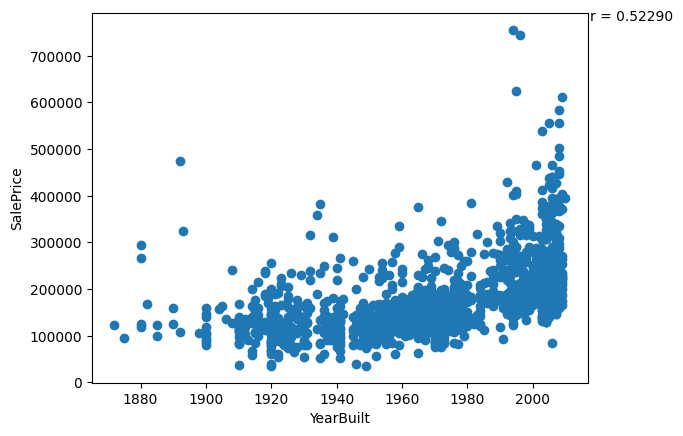

In [38]:
def plot_vars(x, y):
    fig, ax = plt.subplots()
    ax.scatter(x=train_houseprice_data[x], y=train_houseprice_data[y])
    plt.ylabel(y, fontsize=10)
    plt.xlabel(x, fontsize=10)
    plt.text(1.005, 0.98, s = f'r = {np.corrcoef(train_houseprice_data[x], train_houseprice_data[y])[0][1]:.5f}', transform = ax.transAxes)
    plt.show()

plot_vars('YearBuilt', 'SalePrice')

## Preprocessing

In [39]:
def clean(dataframe):
    # get boolean dataframe defining each cell as Nan(True) or not(False)
    null_dataframe = pd.isnull(dataframe)
    # initialize an empty dataframe to track all features, the type, and
    # the number/percent of houses with nan values for that feature
    Nan_dataframe = pd.DataFrame(columns = ['Name', 'Type', 'Nan count', 'Nan %'])
    for column in dataframe:
        # eliminates constants in dataframe
        if len(pd.unique(dataframe[column])) == 1:
            dataframe.drop(columns=column, inplace=True)
        # processes clean variables with no null/nan values
        elif all(cell == False for cell in null_dataframe[column]):
            # checks if variable is quantitative or not
            if pd.api.types.is_numeric_dtype(dataframe[column]):
                Nan_dataframe.loc[len(Nan_dataframe.index)] = [column, 'Quantitative', 0, 0]
            else:
                Nan_dataframe.loc[len(Nan_dataframe.index)] = [column, 'Categorical', 0, 0]
        # processes variables with at least one nan value
        else:
            Nan_count = 0
            total_count = len(dataframe[column])
            # get total number of nan values
            for cell in null_dataframe[column]:
                if cell:
                    Nan_count += 1
            var_type = ''
            # check whether feature is quantitative or categorical
            if pd.api.types.is_numeric_dtype(dataframe[column]):
                var_type = "Quantitative"
            else:
                var_type = "Categorical"
            # add new feature at bottom of nan_dataframe
            Nan_dataframe.loc[len(Nan_dataframe.index)] = [column, var_type, Nan_count, Nan_count / total_count * 100]
            # impute nan values for the feature
            dataframe = impute_Nan(dataframe, Nan_dataframe, column)
    return dataframe, Nan_dataframe


def impute_Nan(dataframe, Nan_df, Var_name): # Nan_df must include a variable type column(quantitative or categorical) and name
    null_df = pd.isnull(dataframe)
    # make variables names index of df
    new_Nan_df = Nan_df.set_index("Name", drop = False)
    row = new_Nan_df.loc[Var_name]
    # if variable is quantitative impute nans with median
    if row['Type'].lower() == 'quantitative':
        dataframe[Var_name].fillna(dataframe[Var_name].median(), inplace = True)
    # imputing nans in categorical variables
    else:
        nul_sum = null_df[Var_name].sum()
        nul_rows = set()
        # if more than 20 nans, replace with None string
        if nul_sum > 20:
            dataframe[Var_name].fillna('None', inplace = True)
        # imputing when less than 20 nans
        else:
            for i, val in enumerate(null_df[Var_name]):
                # adding rows with a nan to set
                if val:
                    nul_rows.add(i)
            # drop all elements in set from the df.
            dataframe.drop(index = nul_rows, inplace = True)
            dataframe.reset_index(drop = True, inplace = True)
            null_df.drop(index = nul_rows, inplace = True)
            null_df.reset_index(drop = True, inplace = True)
    return dataframe

train_data, df2 = clean(train_houseprice_data)
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1447,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1448,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1449,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


In [40]:
train_id = train_data['Id']
train_y = train_data['SalePrice']
train_data.drop(columns= ['Id', 'SalePrice'], inplace = True)

## Ordinal Encoding

In [41]:
def catvar_encode(dataframe):
    for column in dataframe:
        if dataframe[column].dtype == 'O':
            encode_dictionary = {'None': 0}
            digit = 1
            for i, cell in enumerate(dataframe[column]):
                if cell in encode_dictionary:
                    dataframe.loc[i, column] = encode_dictionary[cell]
                else:
                    dataframe.loc[i, column] = digit
                    encode_dictionary[cell] = digit
                    digit += 1
    return dataframe
new_train = catvar_encode(train_data)
new_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,1,65.0,8450,1,0,1,1,1,1,...,0,0,0,0,0,0,2,2008,1,1
1,20,1,80.0,9600,1,0,1,1,1,2,...,0,0,0,0,0,0,5,2007,1,1
2,60,1,68.0,11250,1,0,2,1,1,1,...,0,0,0,0,0,0,9,2008,1,1
3,70,1,60.0,9550,1,0,2,1,1,3,...,0,0,0,0,0,0,2,2006,1,2
4,60,1,84.0,14260,1,0,2,1,1,2,...,0,0,0,0,0,0,12,2008,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,60,1,62.0,7917,1,0,1,1,1,1,...,0,0,0,0,0,0,8,2007,1,1
1447,20,1,85.0,13175,1,0,1,1,1,1,...,0,0,0,1,0,0,2,2010,1,1
1448,70,1,66.0,9042,1,0,1,1,1,1,...,0,0,0,3,1,2500,5,2010,1,1
1449,20,1,68.0,9717,1,0,1,1,1,1,...,0,0,0,0,0,0,4,2010,1,1


In [42]:
summary_df = pd.DataFrame(columns = ['Name', 'n', 'mean', 'standard dev', 'min', 'Q1', 'median', 'Q3', 'max'])
for column in train_data:
    if pd.api.types.is_numeric_dtype(train_data[column]):
        n = len(train_data[column])
        mu = train_data[column].mean()
        sigma = train_data[column].std()
        med = train_data[column].median()
        q1= train_data[column].quantile(0.25)
        q3 = train_data[column].quantile(0.75)
        minimum = train_data[column].min()
        maximum = train_data[column].max()
        summary_df.loc[len(summary_df.index)] = [column, n, mu, sigma, minimum, q1, med, q3, maximum]
summary_df

,Name,n,mean,standard dev,min,Q1,median,Q3,max
0,MSSubClass,1451,56.933150,42.350366,20.0,20.0,50.0,70.0,190.0
1,LotFrontage,1451,69.845624,22.044429,21.0,60.0,69.0,79.0,313.0
2,LotArea,1451,10507.808408,9992.987081,1300.0,7537.5,9477.0,11600.0,215245.0
3,OverallQual,1451,6.093728,1.381467,1.0,5.0,6.0,7.0,10.0
4,OverallCond,1451,5.579600,1.113415,1.0,5.0,5.0,6.0,9.0
5,YearBuilt,1451,1971.092350,30.190266,1872.0,1954.0,1972.0,2000.0,2010.0
6,YearRemodAdd,1451,1984.760165,20.651334,1950.0,1966.0,1993.0,2004.0,2010.0
7,MasVnrArea,1451,103.756720,181.108150,0.0,0.0,0.0,166.0,1600.0
8,BsmtFinSF1,1451,442.274983,455.369276,0.0,0.0,381.0,707.0,5644.0
9,BsmtFinSF2,1451,46.838043,161.777324,0.0,0.0,0.0,0.0,1474.0


## Normalization and train test split

In [43]:
# split up categorical and quantitative variables into separate dfs
new_df2 = df2.set_index('Name')
quan_df = pd.DataFrame()
cat_df = pd.DataFrame()
for col in new_train:
  if new_df2.loc[col, 'Type'] == 'Quantitative':
    quan_df[col] = new_train[col]
  else:
    cat_df[col] = new_train[col]

In [44]:
# normalize df with quantitative variables
sclr = RobustScaler()
Scaled_quan_df = sclr.fit_transform(quan_df)
Scaled_quan = pd.DataFrame(Scaled_quan_df)

In [45]:
# recombine quantitative and categorical variables into one df
final_train_df = pd.concat([Scaled_quan, cat_df], axis = 1)
x_train, x_test, y_train, y_test = tts(final_train_df, train_y, train_size = 0.75)
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

In [47]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1165,-0.6,0.368421,-0.087877,0.0,1.0,-0.304348,-0.921053,0.000000,0.397454,0.0,...,1,1,1,1,1,0,0,1,1,1
809,-0.6,-0.157895,-0.188308,-0.5,0.0,-0.434783,-1.078947,0.000000,-0.538897,0.0,...,5,2,1,1,2,0,0,1,1,5
376,0.2,1.736842,0.410092,1.0,0.0,0.695652,0.315789,0.000000,-0.538897,0.0,...,1,1,1,1,1,0,0,0,1,1
1015,-0.6,-0.263158,-0.509785,0.5,0.0,0.739130,0.342105,0.506024,0.428571,0.0,...,1,1,1,1,1,0,0,0,2,3
1248,0.0,-0.894737,-0.796800,0.0,1.0,-0.891304,-1.131579,0.000000,0.062235,0.0,...,2,2,1,1,1,0,0,0,1,1


## Model Training and Evaluation

### Linear Regression

41983.51030189436 0.7003454925524175


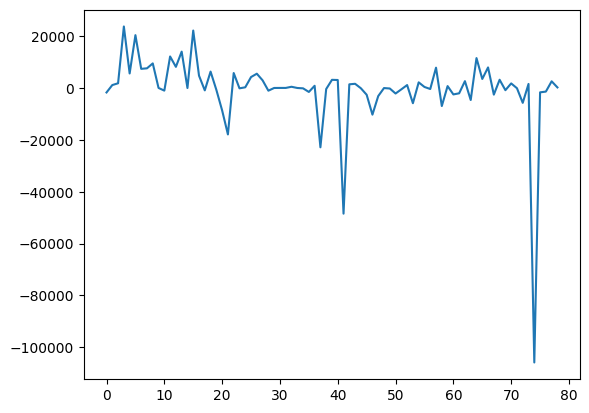

In [48]:
model = LinReg()
model.fit(x_train, y_train)
train_prediction = model.predict(x_test)
train_rmse = RMSE(y_test, train_prediction, squared = False)
print(train_rmse, model.score(x_test, y_test))
h = model.coef_
plt.plot(h) # one variable with very large magnitude weight, so need regularization

### Random Forest Regression

In [49]:
forestmodel = RFR()
forestmodel.fit(x_train, y_train)
forest_pred = forestmodel.predict(x_test)
forestrmse = RMSE(y_test, forest_pred, squared = False)
print(forestrmse, forestmodel.score(x_test, y_test))
w = forestmodel.feature_importances_
impdf = pd.DataFrame(w) # impurity dataframe
impdf

29937.950209234903 0.847627201890295


,0
0,0.002705
1,0.006353
2,0.011139
3,0.544211
4,0.005108
...,...
74,0.000072
75,0.000281
76,0.000030
77,0.001782


### Gradient Boosting(Best Performance)

In [51]:
gboostmodel = GBR()
gboostmodel.fit(x_train, y_train) # gradient boost has validation split as part of training
gboost_pred = gboostmodel.predict(x_test)
gboostrmse = RMSE(y_test, gboost_pred, squared = False)
print(gboostrmse, gboostmodel.score(x_test, y_test))
w = gboostmodel.feature_importances_
impdf = pd.DataFrame(w)
impdf

25611.57975243561 0.8884842900833829


,0
0,0.000163
1,0.002706
2,0.009408
3,0.482754
4,0.007456
...,...
74,0.000000
75,0.000017
76,0.000000
77,0.001392


### Lasso Regression

In [52]:
lassomodel = Lasso(alpha = 1.5, max_iter = 100000)
lassomodel.fit(x_train, y_train)
lassopred = lassomodel.predict(x_test)
lassormse = RMSE(y_test, lassopred)
print(lassormse, lassomodel.score(x_test, y_test))

1765811547.3875225 0.6998020848173239


## Prediction on Test Data

In [55]:
# read from drive
test_houseprice_data = pd.read_csv('/content/drive/MyDrive/PycharmProjects/HelloWorld/test.csv')

In [56]:
test_data, nan_data = clean(test_houseprice_data)
new_test = catvar_encode(test_data)
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,1,80.0,11622,1,0,1,1,1,...,120,0,0,1,0,0,6,2010,1,1
1,1462,20,2,81.0,14267,1,0,2,1,1,...,0,0,0,0,1,12500,6,2010,1,1
2,1463,60,2,74.0,13830,1,0,2,1,1,...,0,0,0,1,0,0,3,2010,1,1
3,1464,60,2,78.0,9978,1,0,2,1,1,...,0,0,0,0,0,0,6,2010,1,1
4,1465,120,2,43.0,5005,1,0,2,2,1,...,144,0,0,0,0,0,1,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,2915,160,3,21.0,1936,1,0,1,1,1,...,0,0,0,0,0,0,6,2006,1,1
1430,2916,160,3,21.0,1894,1,0,1,1,1,...,0,0,0,0,0,0,4,2006,1,3
1431,2917,20,2,160.0,20000,1,0,1,1,1,...,0,0,0,0,0,0,9,2006,1,3
1432,2918,85,2,62.0,10441,1,0,1,1,1,...,0,0,0,1,2,700,7,2006,1,1


In [57]:
test_id = new_test['Id']
new_test.drop(columns = ['Id'], inplace = True)

In [58]:
new_nan = nan_data.set_index('Name')
testquan_df = pd.DataFrame()
testcat_df = pd.DataFrame()
for col in new_test:
  if new_nan.loc[col, 'Type'] == 'Quantitative':
    testquan_df[col] = new_test[col]
  else:
    testcat_df[col] = new_test[col]

In [61]:
testsclr = RobustScaler()
Scaled_testquan = testsclr.fit_transform(testquan_df)
Scaled_testquan = pd.DataFrame(Scaled_testquan)

In [62]:
final_test_df = pd.concat([Scaled_testquan, testcat_df], axis = 1)
final_test_df.columns = final_test_df.columns.astype(str)
final_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,-0.6,0.722222,0.546902,-0.5,1.0,-0.255319,-0.765432,0.000000,0.151205,144.0,...,1,1,1,1,1,0,1,0,1,1
1,-0.6,0.777778,1.189672,0.0,1.0,-0.319149,-0.839506,0.658537,0.752063,0.0,...,1,1,1,1,1,0,0,1,1,1
2,0.2,0.388889,1.083475,-0.5,0.0,0.510638,0.148148,0.000000,0.577748,0.0,...,1,2,1,1,1,0,1,0,1,1
3,0.2,0.611111,0.147388,0.0,1.0,0.531915,0.148148,0.121951,0.328161,0.0,...,1,2,1,1,1,0,0,0,1,1
4,1.4,-1.333333,-1.061118,1.0,0.0,0.404255,0.000000,0.000000,-0.119511,0.0,...,1,3,1,1,1,0,0,0,1,1


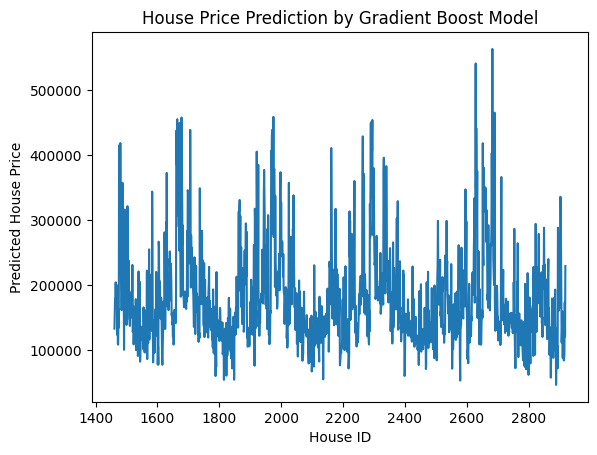

In [69]:
test_pred = gboostmodel.predict(final_test_df)
plt.plot(test_id, test_pred);
plt.xlabel('House ID')
plt.ylabel('Predicted House Price')
plt.title('House Price Prediction by Gradient Boost Model');